In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.__version__

'2.6.0'

In [5]:
# The Fashion MNIST data is available directly in the tf.keras datasets API
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## The dataset

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset produced and maintained by Zalando. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a `28x28` grayscale image, associated with a label from 10 classes. 



9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

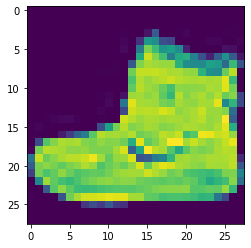

In [7]:
np.set_printoptions(linewidth=200)

# print an example image
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

Since all values in each image represent a gray-scale value, e.g. [0, 255], it is worth **normalizing** them when training neural networks. 

This is a simple vectorized operation with numpy:


In [8]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [34]:
training_images.shape

(60000, 28, 28)

## The model

In [42]:
# start with a very simple model:
# 28x28 pixels input -> 128 neurons hidden layer -> 10 neurous output layer
# The output layer size matches the number of classes we want to predict.
# Flatten turns the input matrix into a 1-D array
# Softmax takes a set of values, and effectively picks the biggest one,
# effectivelly telling us which class has the higher probability.

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# build the model given an optimizer and loss function to use for evaluation
model.compile(optimizer = tf.optimizers.Adam(),
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

batch_size = 32
model.build(input_shape=(batch_size,784))

In [43]:
# review the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (32, 784)                 0         
_________________________________________________________________
dense_28 (Dense)             (32, 128)                 100480    
_________________________________________________________________
dense_29 (Dense)             (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [45]:
# train the model
model.fit(training_images,
          training_labels,
          batch_size = batch_size,
          epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.2813 - accuracy: 0.8954
Epoch 2/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.2691 - accuracy: 0.8989
Epoch 3/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.2579 - accuracy: 0.9031
Epoch 4/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.2480 - accuracy: 0.9070
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2359 - accuracy: 0.9120


In [46]:
# Let's see how the model performs on data it has not seen during training
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 590us/step - loss: 0.3491 - accuracy: 0.8774


[0.34910160303115845, 0.8773999810218811]